EDA on the Retail Sales Dataset

1. Data Collection:
First, a Retail Sales Dataset was taken from Kaggle to perform the Exploratory Data Analysis

2. Data Cleaning & Preprocessing:
a. Import Libraries:

In [3]:
pip install pandas numpy matplotlib seaborn



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     ---------- -------------------------- 30.7/104.0 kB 186.2 kB/s eta 0:00:01
     ---------- -------------------------- 30.7/104.0 kB 186.2 kB/s eta 0:00:01
     ------------------------- ----------- 71.7/104.0 kB 326.8 kB/s eta 0:00:01
     -------------------------------- ---- 92.2/104.0 kB 348.6 kB/s eta 0:00:01
     -----------------------------------  102.4/104.0 kB 328.0 kB/s eta 0:00:01
     ------------------------------------ 104.0/104.0 kB 285.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.1/8.0 MB 3.6 MB/s eta 0:00:03
   - -------------------

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

b. Load the Dataset:

In [ ]:
# Load the dataset (adjust the file path as necessary)
df = pd.read_csv('retail_sales_dataset.csv')

c. Inspect the Data:

In [7]:
# Check the first few rows and data types
print(df.head())
print(df.info())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

d. Handle Missing Values:
Check for missing values and decide how to handle them (e.g., removing rows, filling with mean/median, or forward filling).

In [10]:
# Check for missing values
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


e. Remove Duplicates:

In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

f. Convert Data Types:
Ensure all columns have appropriate data types (e.g., Date as datetime).

In [11]:
df['Date'] = pd.to_datetime(df['Date'])


3. Exploratory Data Analysis (EDA)
a. Summary Statistics:
Get an overview of the numerical data.

In [12]:
# Summary statistics
print(df.describe())

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

b. Sales Distribution (Overall Sales):
Plot the distribution of total sales to understand the general sales performance.

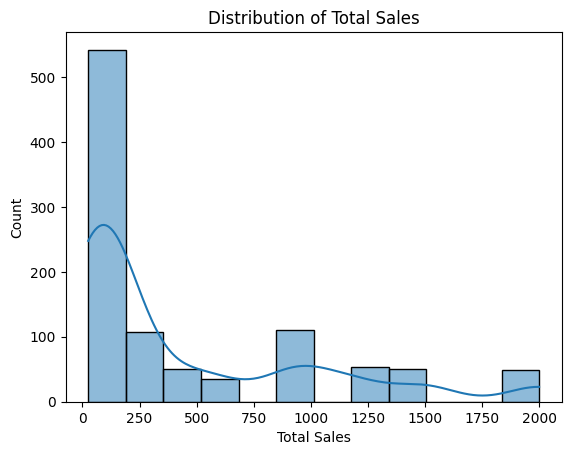

In [15]:
# Plot the total sales distribution
if 'Quantity' in df.columns and 'Price per Unit' in df.columns:
    df['Total Sales'] = df['Quantity'] * df['Price per Unit']
else:
    print("Required columns not found.")

# Now, plot the total sales distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Total Sales'], kde=True)
plt.title('Distribution of Total Sales')
plt.show()

c. Top-Selling Products:
Identify the top-selling products based on total sales.

C:\Users\Aishwarya'\AppData\Local\Temp\ipykernel_10040\135148095.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category', y='Total Amount', data=sales_by_category, palette='viridis')


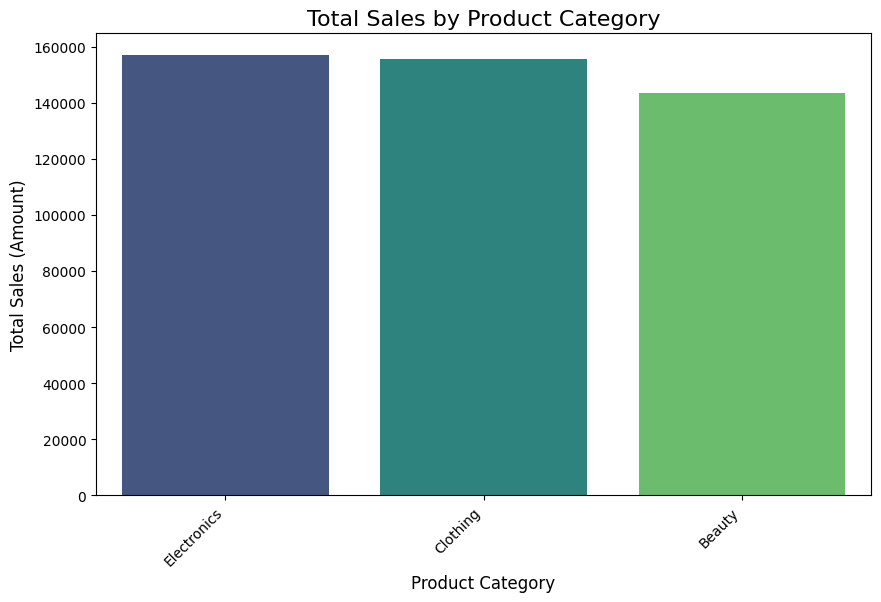

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Grouping by Product Category and summing the Total Amount for each category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().reset_index()

# Sort the values to view the top-selling categories
sales_by_category = sales_by_category.sort_values(by='Total Amount', ascending=False)

# Plot the data using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='Product Category', y='Total Amount', data=sales_by_category, palette='viridis')

# Adding titles and labels
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales (Amount)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Display the plot
plt.show()


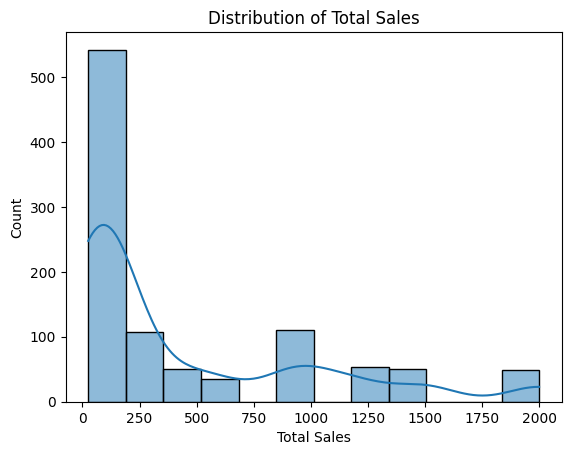

In [ ]:
# Plot the total sales distribution
if 'Quantity' in df.columns and 'Price per Unit' in df.columns:
    df['Total Sales'] = df['Quantity'] * df['Price per Unit']
else:
    print("Required columns not found.")

# Now, plot the total sales distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Total Sales'], kde=True)
plt.title('Distribution of Total Sales')
plt.show()

d. Sales Trends Over Time:
Analyze sales over time to identify any patterns or trends.

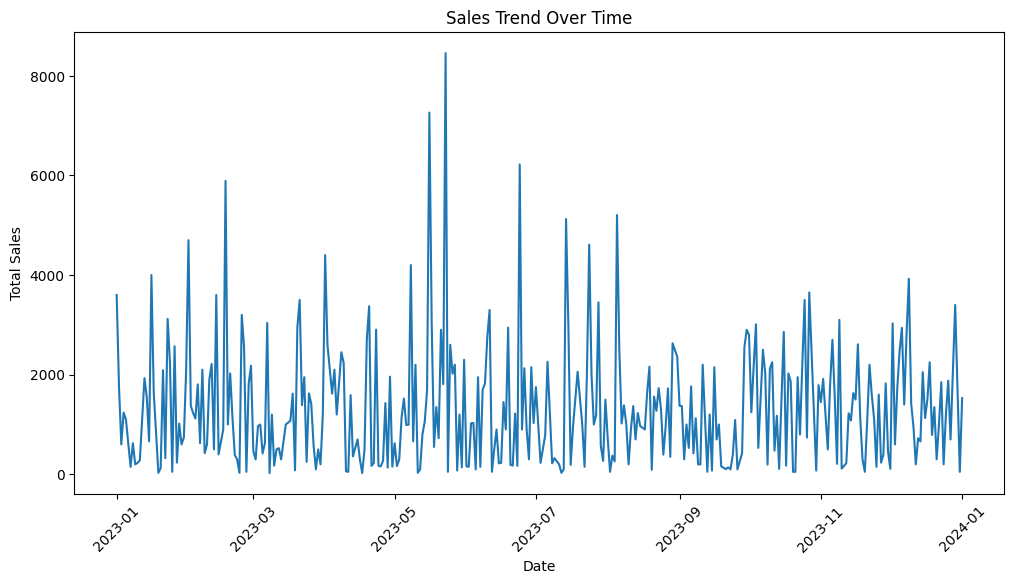

In [20]:
# Grouping by date and summing sales
sales_over_time = df.groupby('Date')['Total Sales'].sum()

# Plotting the sales trend
plt.figure(figsize=(12,6))
plt.plot(sales_over_time)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


4. Visualizing Key Insights:
a. Top Selling Categories:
If the dataset contains categories, you can plot the sales performance by category.

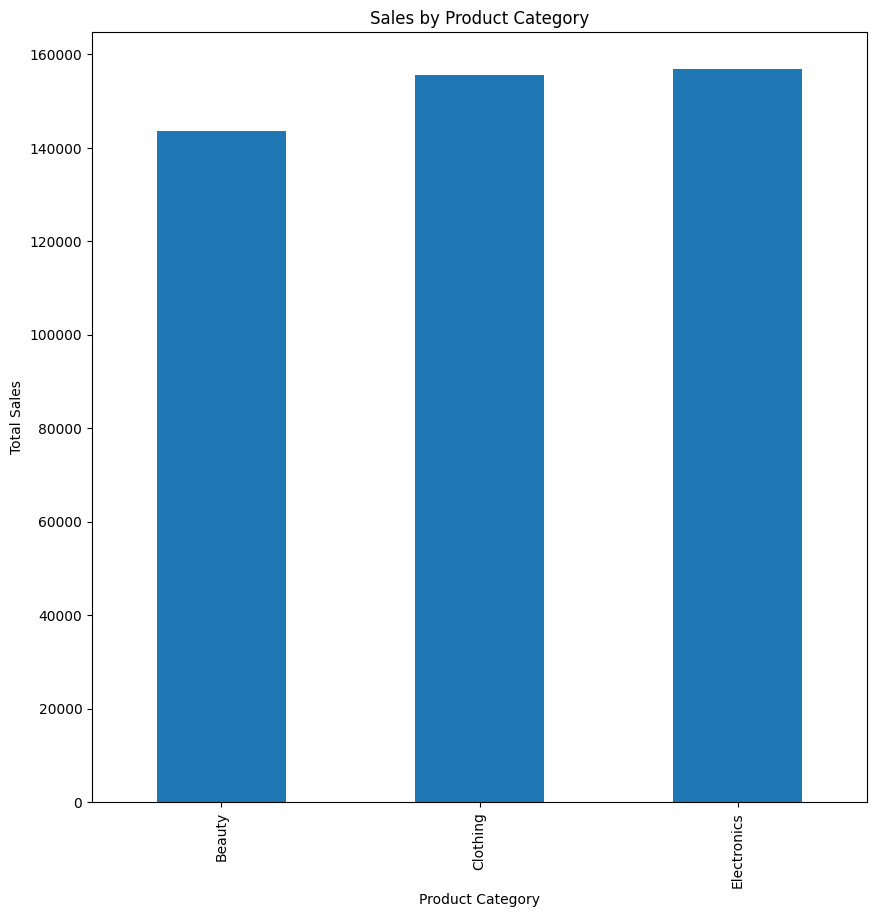

In [24]:
# Sum of sales by product category
sales_by_category = df.groupby('Product Category')['Total Sales'].sum()
sales_by_category.plot(kind='bar', figsize=(10,10))
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()


b. Sales by Customer Segment:
If customer segmentation data exists (e.g., age, gender), analyze how different segments perform.

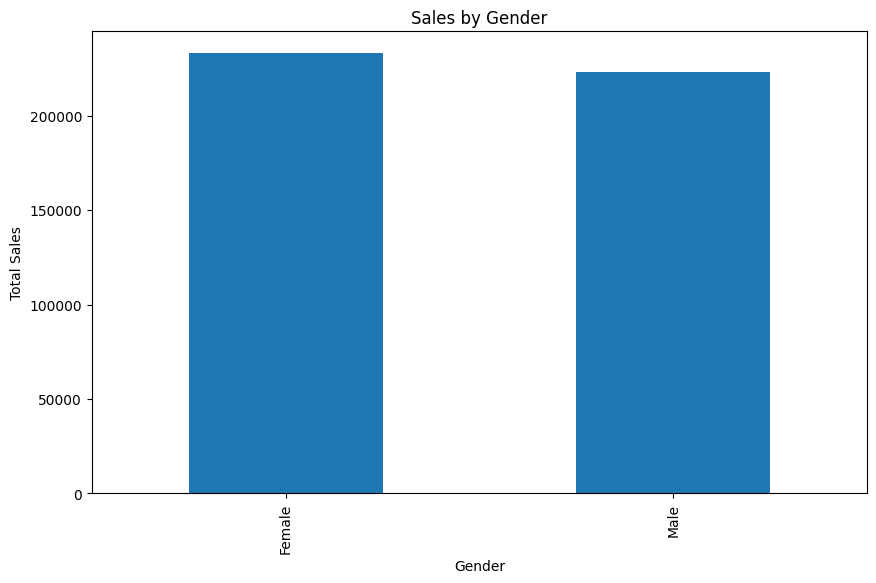

In [25]:
# Example: sales by gender
sales_by_gender = df.groupby('Gender')['Total Sales'].sum()
sales_by_gender.plot(kind='bar', figsize=(10,6))
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()


c. Correlation Matrix:
Look at the correlations between numerical features (like Total Sales, Quantity, Price, etc.).

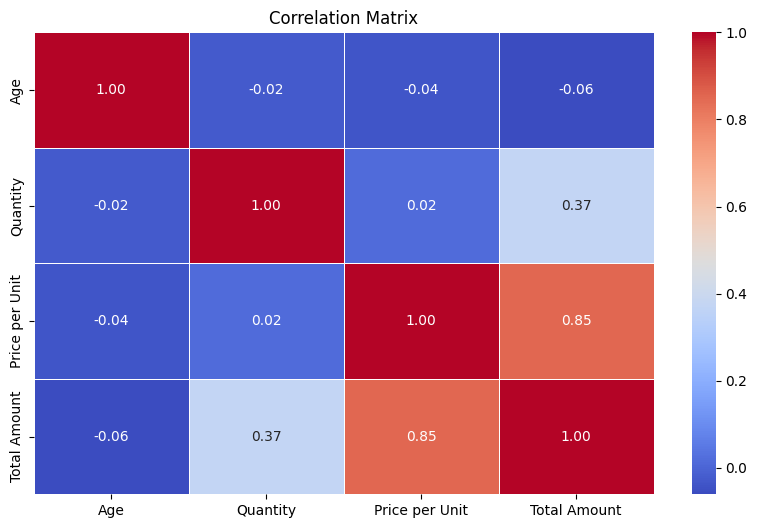

In [27]:
df_numeric = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]  # Select numeric columns

# Calculate the correlation matrix
corr = df_numeric.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

5. Export Cleaned Data:
After the cleaning and analysis, export the cleaned and transformed data for use in Tableau.

In [28]:
# Save the cleaned dataset for further use
df.to_csv('cleaned_retail_sales.csv', index=False)
